# Analysis of benchmark data

## General remarks

Shell command used to gather data:

```shell
./bin/project2 2 1000 10 400 4000 0.1 && ./bin/project2 3 680 10 400 4000 0.1 && ./bin/project2 4 500 10 400 4000 0.1 && ./bin/project2 5 200 10 400 4000 0.1 && ./bin/project2 6 150 10 400 4000 0.1 && ./bin/project2 7 100 10 400 4000 0.1 && ./bin/project2 8 50 10 400 4000 0.1
```

Benchmarks done on my desktop (WSL) with a Intel i5 Quadcore CPU (with 2x Hyperthreading/SMT). Note that the amount of work done per individual benchmark is not the same.
When more than 4 threads are used, Simultanous Multithreading (SMT, up to 8 threads) is used and the performance drops significantly --> the amount of time to complete one benchmark increases drastically. Thats why I had to reduce the workload drastically to gather sample data for for the different locks.

For similar reasons I only used 10 test iterations



In [16]:
# from csv import reader, DictReader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import itertools

In [102]:
def strip_cols(df, toStrip=" "):
    """Strips the column names of unwanted characters (such as blanks) and replaces them.
    """
    newcols = []
    for i, col in enumerate(df.columns):
        newcol = col.strip(toStrip)
        newcols.append(newcol)
    df.columns = newcols

In [103]:
### LEGACY CODE ###
def get_merged_csv_old(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], axis=0, ignore_index=True)

def eval_csv_old(file, dsp=False):
    df = pd.read_csv(file, delimiter=";")
    strip_cols(df, toStrip=" ")
    param_cols = df.columns[0:5]
    result_cols = df.columns[5:]
    
    new_result_cols = [pair[0]+pair[1] for pair in itertools.product(result_cols, ["_mean", "_std", "_min", "_max"])]
    #means = df[result_cols].mean()
    #std = df[result_cols].std()
    #mins = df[result_cols].min()
    #maxs = df[result_cols].max()
    #for col in new_result_cols:
    stats = df.loc[:,param_cols].describe()
    params = df.loc[0,param_cols]
    
    analysis = [params, stats]
        
    if print:
        #display(df.head())
        #print("Param columns:",param_cols)
        #print("Result columns:",result_cols)
        #print("New result columns:", new_result_cols)
        print("Params:")
        display(params)
        print("Stats")
        display(stats)
    
    return analysis, df

In [104]:
path = os.getcwd()
fmask = os.path.join(path, 'results/*.csv')
print(fmask)
df = get_merged_csv(glob.glob(fmask), delimiter=";")
strip_cols(df)
df

/Users/peterholzner/Code/amp/project/Code/results/*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
0,Taubenfeld_Paper_1_atomic,6,150,10,3600,0,0,0,0,0,...,2.43453,2.43453,6.31453,1.01866,3.41538,6.63666,187.857,0,187.857,187.857
1,Taubenfeld_Paper_1_atomic,7,100,10,2800,0,0,0,0,0,...,3.494,3.494,1.69918,1.44968,1.24075,5.82504,124.987,0,124.987,124.987
2,Lamport_Lecture_atomic,2,1000,10,8000,0,0,0,0,0,...,0.125868,0.125868,0.134823,0.00455589,0.133382,0.147789,5.48021,0,5.48021,5.48021
3,Taubenfeld_Paper_1_atomic,5,200,10,4000,0,0,0,0,0,...,3.57373,3.57373,2.98047,0.316585,2.88036,3.88149,134.358,2.99591e-14,134.358,134.358
4,Taubenfeld_Paper_1_atomic,4,500,10,8000,0,0,0,0,0,...,0.1006,0.1006,0.0937681,7.97526e-05,0.0935411,0.0937933,5.52981,9.36222e-16,5.52981,5.52981
5,Lamport_Lecture_atomic,3,680,10,8160,0,0,0,0,0,...,0.102196,0.102196,0.133054,0.0125383,0.0973693,0.137019,5.9272,0,5.9272,5.9272
6,Lamport_Lecture_atomic,6,150,10,3600,0,0,0,0,0,...,0.0500474,0.0500474,3.42044,1.10716,3.07033,6.57148,191.907,2.99591e-14,191.907,191.907
7,Lamport_Lecture_atomic,4,500,10,8000,0,0,0,0,0,...,0.100369,0.100369,0.0977802,0.000886418,0.0974999,0.100303,5.4374,9.36222e-16,5.4374,5.4374
8,Taubenfeld_Paper_1_atomic,3,680,10,8160,0,0,0,0,0,...,0.102099,0.102099,0.100399,0.00254238,0.0931633,0.101203,5.61829,9.36222e-16,5.61829,5.61829
9,Taubenfeld_Paper_1_atomic,2,1000,10,8000,0,0,0,0,0,...,0.0897782,0.0897782,0.0904701,0.00201949,0.0898315,0.0962177,4.58296,0,4.58296,4.58296


In [196]:
def eval_csv(file, idxResults=5, dsp=False, ret_orig=False):
    """
    Reads a csv in our benchmark_format and evaluates it.
    
    Evaluation is done on a per-column-basis (only for results, not parameters).
    The columns [0, idxResult) are considered as parameters, the rest as results.
    Evaluations performed: mean, std, min, max
    """
    df = pd.read_csv(file, delimiter=";")
    param_cols = df.columns[0:idxResults]
    result_cols = df.columns[idxResults:]
    
    new_result_cols = [pair[0]+pair[1] for pair in itertools.product(result_cols, [":mean", ":std", ":min", ":max"])]
    stats_dict = {
        "mean": df[result_cols].mean(),    
        "std": df[result_cols].std(),
        "min": df[result_cols].min(),
        "max": df[result_cols].max()
    }
    stats = pd.DataFrame(columns=new_result_cols)
    for col in stats.columns:
        res, stat = col.split(":")
        stats.loc[0,col] = stats_dict[stat][res]
        
    params = df.loc[0,param_cols].to_frame().T
    analysis = pd.concat([params, stats], axis=1)
        
    if dsp:
        #display(df.head())
        #print("Param columns:",param_cols)
        #print("Result columns:",result_cols)
        #print("New result columns:", new_result_cols)
        print("Params:")
        display(params)
        print("Stats")
        display(stats)
    
    if ret_orig:
        return analysis, df
    else:
        return analysis

def get_cols(file, idxResults=5, dsp=False):
    df_csv = pd.read_csv(file, delimiter=";")
    param_cols = df_csv.columns[0:idxResults]
    result_cols = df_csv.columns[idxResults:]
    return param_cols, result_cols
    
def get_merged_csv(flist, **kwargs):
    return pd.concat([eval_csv(f) for f in flist], axis=0, ignore_index=True), get_cols(flist[0])

In [197]:
# To read only files from a certain lock or lock type --> use regex
# Here for Taubenfeld locks
path = os.getcwd()
lock = "Taubenfeld"
fmask = os.path.join(path, f"results/*_{lock}_*.csv") # File name mask for filtering
print("File mask:", fmask)

# Evaluate and merge evaluations into 1 DataFrame
df, (param_cols, result_cols) = get_merged_csv(glob.glob(fmask), delimiter=";")
df

File mask: /Users/peterholzner/Code/amp/project/Code/results/*_Taubenfeld_*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
0,Taubenfeld_Paper_1_atomic,6,150,10,3600,0,0,0,0,0,...,2.43453,2.43453,6.31453,1.01866,3.41538,6.63666,187.857,0,187.857,187.857
1,Taubenfeld_Paper_1_atomic,7,100,10,2800,0,0,0,0,0,...,3.494,3.494,1.69918,1.44968,1.24075,5.82504,124.987,0,124.987,124.987
2,Taubenfeld_Paper_1_atomic,5,200,10,4000,0,0,0,0,0,...,3.57373,3.57373,2.98047,0.316585,2.88036,3.88149,134.358,2.99591e-14,134.358,134.358
3,Taubenfeld_Paper_1_atomic,4,500,10,8000,0,0,0,0,0,...,0.1006,0.1006,0.0937681,7.97526e-05,0.0935411,0.0937933,5.52981,9.36222e-16,5.52981,5.52981
4,Taubenfeld_Paper_1_atomic,3,680,10,8160,0,0,0,0,0,...,0.102099,0.102099,0.100399,0.00254238,0.0931633,0.101203,5.61829,9.36222e-16,5.61829,5.61829
5,Taubenfeld_Paper_1_atomic,2,1000,10,8000,0,0,0,0,0,...,0.0897782,0.0897782,0.0904701,0.00201949,0.0898315,0.0962177,4.58296,0,4.58296,4.58296
6,Taubenfeld_Paper_1_atomic,8,50,10,1600,0,0,0,0,0,...,0.153502,0.153502,0.182575,0.0533828,0.0306447,0.199456,40.4512,7.48978e-15,40.4512,40.4512


In [198]:
# Here for Lamport locks
path = os.getcwd()
lock = "Lamport"
fmask = os.path.join(path, f"results/*_{lock}_*.csv")
print(fmask)
df, (param_cols, result_cols) = get_merged_csv(glob.glob(fmask), delimiter=";")
df

/Users/peterholzner/Code/amp/project/Code/results/*_Lamport_*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
0,Lamport_Lecture_atomic,2,1000,10,8000,0,0,0,0,0,...,0.125868,0.125868,0.134823,0.00455589,0.133382,0.147789,5.48021,0,5.48021,5.48021
1,Lamport_Lecture_atomic,3,680,10,8160,0,0,0,0,0,...,0.102196,0.102196,0.133054,0.0125383,0.0973693,0.137019,5.9272,0,5.9272,5.9272
2,Lamport_Lecture_atomic,7,100,10,2800,0,0,0,0,0,...,0.0394395,0.0394395,4.19782,1.46378,0.0318197,4.66071,123.623,2.99591e-14,123.623,123.623
3,Lamport_Lecture_atomic,6,150,10,3600,0,0,0,0,0,...,0.0500474,0.0500474,3.42044,1.10716,3.07033,6.57148,191.907,2.99591e-14,191.907,191.907
4,Lamport_Lecture_atomic,4,500,10,8000,0,0,0,0,0,...,0.100369,0.100369,0.0977802,0.000886418,0.0974999,0.100303,5.4374,9.36222e-16,5.4374,5.4374
5,Lamport_Lecture_atomic,5,200,10,4000,0,0,0,0,0,...,3.67256,3.67256,2.63001,0.108773,2.59561,2.93958,151.931,0,151.931,151.931
6,Lamport_Lecture_atomic,8,50,10,1600,0,0,0,0,0,...,1.26081,1.26081,0.101652,0.2633,0.018389,0.851018,53.5679,7.48978e-15,53.5679,53.5679


In [258]:
# Here to read ALL csvs in the folder
path = os.getcwd()
fmask = os.path.join(path, f"results/*.csv")
print(fmask)
df, (param_cols, result_cols) = get_merged_csv(glob.glob(fmask), delimiter=";")
df = df.sort_values(["lock_name", "num_threads"])
df

/Users/peterholzner/Code/amp/project/Code/results/*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
16,Aravind,2,1000,10,8000,0,0,0,0,0,...,0.0855596,0.0881217,23139.4,214.566,22695.9,23375.5,4.38514,0,4.38514,4.38514
13,Aravind,3,680,10,8160,0,0,0,0,3.1,...,0.0888575,0.104928,22144.7,1136.23,19442,22958.1,4.70607,9.36222e-16,4.70607,4.70607
2,Aravind,4,500,10,8000,0,0,0,0,4.8,...,0.0916105,0.249776,18045.7,5046.39,8007.17,21831.6,5.36439,0,5.36439,5.36439
1,Aravind,5,200,10,4000,0,0,0,0,4.5,...,1.90909,4.29139,343.516,87.3312,233.025,523.81,137.933,0,137.933,137.933
7,Aravind,6,150,10,3600,0,0,0,0,9.2,...,1.90202,6.26655,234.796,103.765,143.62,473.181,181.411,2.99591e-14,181.411,181.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Taubenfeld_Paper_1_atomic,4,500,10,8000,0,0,0,0,0,...,0.091217,0.0974469,21551.3,447.38,20524,21925.7,5.40149,9.36222e-16,5.40149,5.40149
31,Taubenfeld_Paper_1_atomic,5,200,10,4000,0,0,0,0,0,...,1.26384,5.6289,359.746,173.583,177.655,791.236,134.85,2.99591e-14,134.85,134.85
21,Taubenfeld_Paper_1_atomic,6,150,10,3600,0,0,0,0,0,...,0.478524,6.64511,460.127,520.347,135.438,1880.78,177.122,2.99591e-14,177.122,177.122
29,Taubenfeld_Paper_1_atomic,7,100,10,2800,0,0,0,0,0,...,0.0323114,4.66514,2619.62,6739.22,150.049,21664.2,126.819,1.49796e-14,126.819,126.819


In [201]:
param_cols, result_cols

(Index(['lock_name', 'num_threads', 'num_turns', 'num_tests', 'num_events'], dtype='object'),
 Index(['mutex_fail_count', 'fcfs_fail_count', 'lru_fail_count',
        'thp_runtime_wanc', 'thp_wanc', 'anc', 'thp_runtime_ref', 'thp_ref',
        'bm_runtime'],
       dtype='object'))

In [352]:
all_locks = df["lock_name"].unique()
print("# of different locks/versions:", all_locks.shape[0])
all_locks

# of different locks/versions: 12


array(['Aravind', 'Aravind_fix', 'Jayanti', 'Jayanti_BT',
       'Lamport_Lecture', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix',
       'Lamport_Original', 'Reference-Lock', 'Taubenfeld_Paper_1',
       'Taubenfeld_Paper_1_Fix', 'Taubenfeld_Paper_1_atomic'],
      dtype=object)

In [355]:
good_locks = ['Aravind_fix', 'Jayanti', 'Jayanti_BT',\
              'Lamport_Lecture_atomic', 'Lamport_Lecture_fix',\
              'Taubenfeld_Paper_1_atomic',\
              'Reference-Lock']

# Evaluation

In [265]:
import matplotlib as mpl

#mpl.style.use("classic")
mpl.style.use("seaborn")

In [266]:
def plot_col_old(df, x_col="num_threads", y_col="mutex_fail_count", title=None, norm=False):
    
    if not title:
        title = y_col + " over " + x_col
    locks = df["lock_name"].unique()
    plt.figure(figsize=(14,8))

    for lock in locks:
        x, y = df[df["lock_name"]==lock][x_col], df[df["lock_name"]==lock][y_col]
        if norm:
            y /= df[df["lock_name"]==lock]["num_events"]*4
        plt.plot(x, y, label=lock, marker="x", linewidth=2)
    plt.grid(True)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    xticks = np.arange(x.min(), x.max()+1, 1)
    plt.xticks(ticks=xticks);
    plt.suptitle(title, fontsize=28, fontweight="bold");

In [383]:
# Line Style rotation used
lstyle_rotation = ['-', '--', '-.', ':']
# Some factors to control how the error bars are calculated based on the std
powFact = 1
multFact = 1


def plot_col(df, x_col="num_threads", y_col="mutex_fail_count", locksToPlot=good_locks,
             title=None, norm=False, errBarMode="sem", paramPos=(0.35, 0.85), **kwargs):
    """A convenience function for plotting.
    
    -) xcol, ycol are the names of the columns to use for plotting. The mean is 
        plotted for ycol with an errorbar based on std (standard deviation)
    """
    assert errBarMode in ["std", "sem", "minmax", "None"], "Error mode unknown"
    
    # Filtering locksToPlot
    if not title:
        title = y_col + " over " + x_col
        
    if isinstance(locksToPlot, str):
        locks = [l for l in df["lock_name"].unique() if locksToPlot in l]
    elif isinstance(locksToPlot, np.ndarray):
        locks = locksToPlot
    elif not locksToPlot:
        locks = df["lock_name"].unique()
    else:
        locks = locksToPlot
        
        
    print("Plotting locks:", locks)
    fig, ax = plt.subplots(figsize=(14,8))

    for i, lock in enumerate(locks):
        lstyle = lstyle_rotation[i%len(lstyle_rotation)]
        x, y = df[df["lock_name"]==lock][x_col],\
                     df[df["lock_name"]==lock][y_col+":mean"]
        if errBarMode=="std":
            yerr = multFact * np.power(df[df["lock_name"]==lock][y_col+":std"], powFact)
        elif errBarMode=="sem":
            num_tests = df.loc[0,"num_tests"]
            yerr = multFact * np.power(df[df["lock_name"]==lock][y_col+":std"], powFact) / np.sqrt(num_tests)
        elif errBarMode=="minmax":
            yerr = multFact * np.power( (df[df["lock_name"]==lock][y_col+":min"], df[df["lock_name"]==lock][y_col+":max"]) , powFact)
        elif errBarMode=="None":
            yerr = None
            
        if norm:
            y /= df[df["lock_name"]==lock]["num_events"]*4
            yerr /= df[df["lock_name"]==lock]["num_events"]*4
        plt.errorbar(x, y, yerr=yerr, label=lock, marker="o", linewidth=2, ls=lstyle, capsize=5, capthick=2, **kwargs)
        #sns.pointplot(x="time", y="total_bill", dodge=True,)
    text = "Parameters:\n" + df.loc[0,param_cols[1:]].to_string() + f"\nerror                 {errBarMode}"
    #text = "a"
    plt.figtext(*paramPos, text, fontsize=14, verticalalignment='top', bbox={"facecolor": "white", "edgecolor": "green","alpha": 0.7})
    plt.grid(True)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    xticks = np.arange(x.min(), x.max()+1, 1)
    plt.xticks(ticks=xticks);
    plt.suptitle(title, fontsize=28, fontweight="bold");

# Mutex failures over nthreads

Plotting locks: ['Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic', 'Reference-Lock']


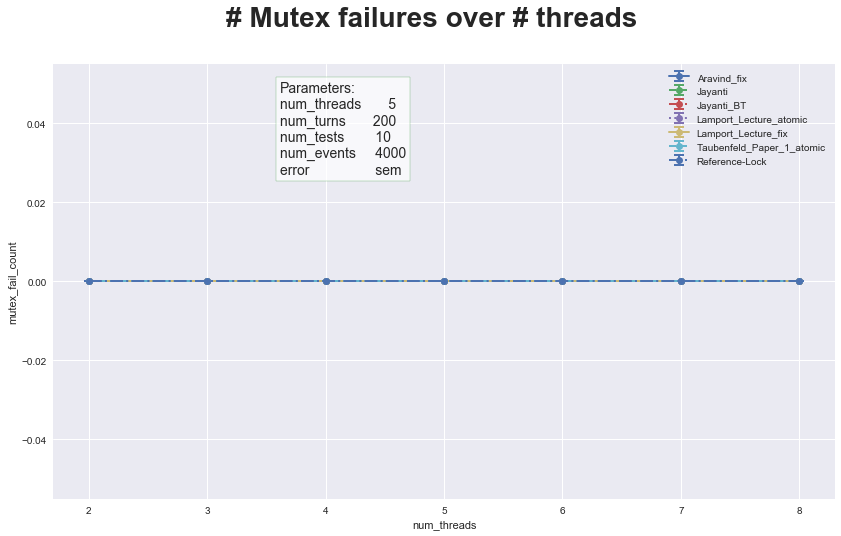

In [384]:
plot_col(df, x_col="num_threads", y_col="mutex_fail_count", title="# Mutex failures over # threads", norm=False)

# FCFS failures over nthreads

Plotting locks: ['Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic', 'Reference-Lock']


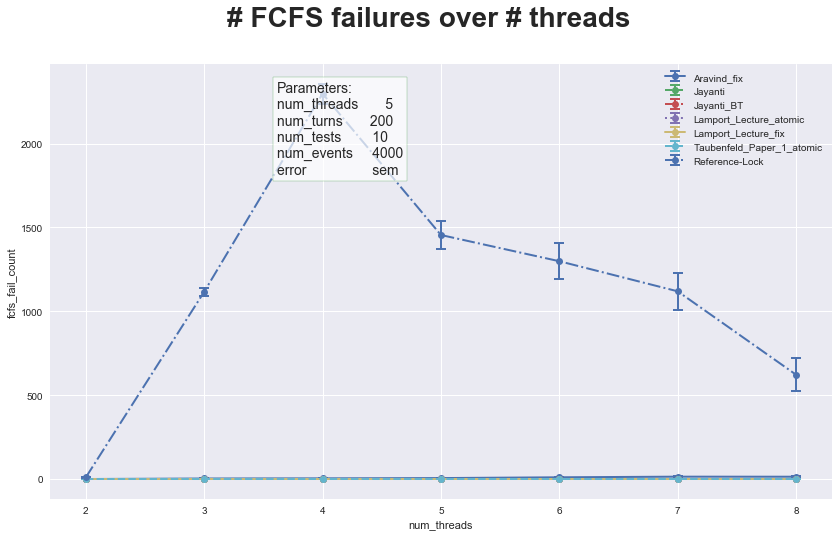

In [385]:
plot_col(df, x_col="num_threads", y_col="fcfs_fail_count", title="# FCFS failures over # threads", norm=False)
plt.savefig("plots/fcfs_fails.png")
plt.show()

# LRU failures over nthreads

In [418]:
all_locks
filtered = list(filter(lambda x: not any([x.find(l)>=0 for l in ["Reference-Lock", "Taubenfeld"]]), all_locks))
filtered

['Aravind',
 'Aravind_fix',
 'Jayanti',
 'Jayanti_BT',
 'Lamport_Lecture',
 'Lamport_Lecture_atomic',
 'Lamport_Lecture_fix',
 'Lamport_Original']

Plotting locks: ['Jayanti', 'Jayanti_BT']


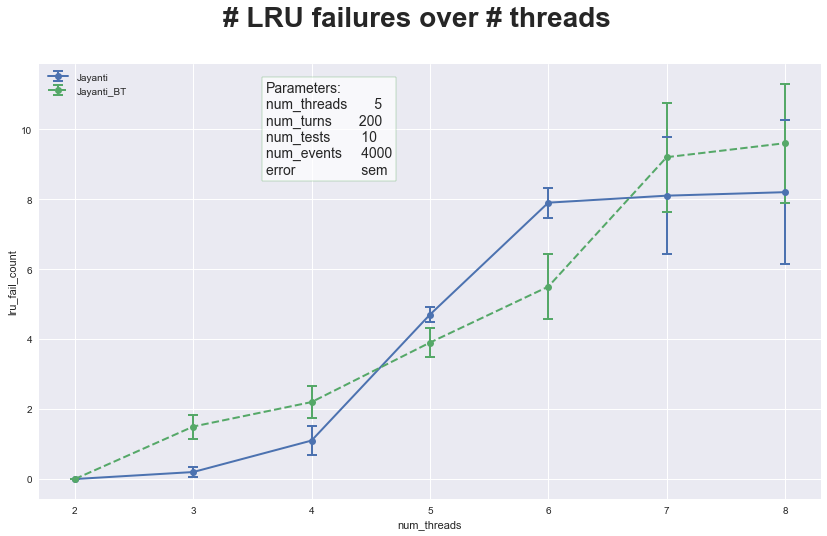

Plotting locks: ['Aravind', 'Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Lamport_Original']


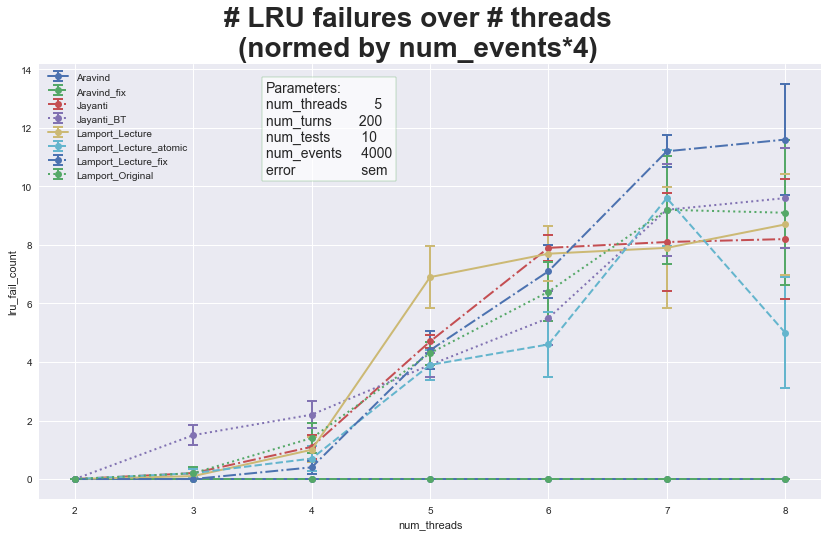

In [419]:
plot_col(df, x_col="num_threads", y_col="lru_fail_count", title="# LRU failures over # threads",\
         norm=False, locksToPlot="Jayanti") # Only plotting the Jayantis
plt.savefig("plots/lru_fails.png")
plt.show()
plot_col(df, x_col="num_threads", y_col="lru_fail_count", title="# LRU failures over # threads\n(normed by num_events*4)", 
         norm=False, locksToPlot=filtered)
plt.savefig("plots/lru_fails_normed.png")
plt.show()

In [420]:
result_cols

Index(['mutex_fail_count', 'fcfs_fail_count', 'lru_fail_count',
       'thp_runtime_wanc', 'thp_wanc', 'anc', 'thp_runtime_ref', 'thp_ref',
       'bm_runtime'],
      dtype='object')

# Runtime (of throughput test)

Plotting locks: ['Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic', 'Reference-Lock']


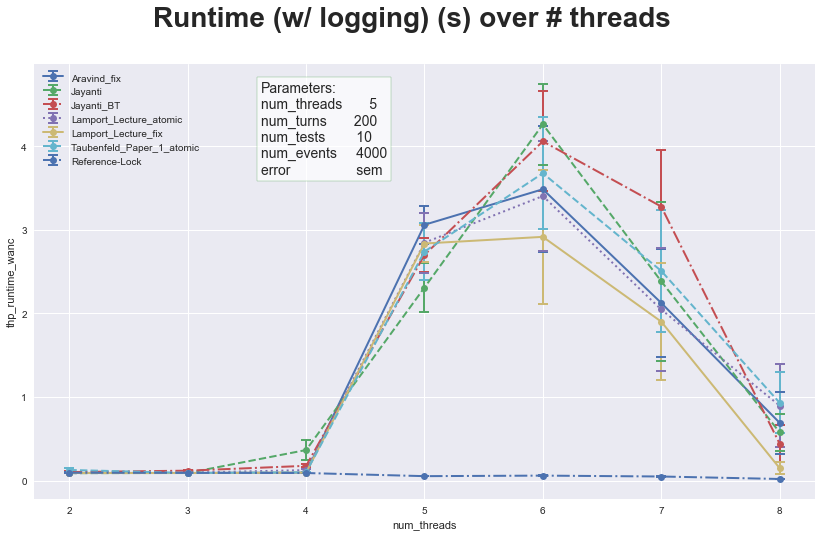

Plotting locks: ['Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic', 'Reference-Lock']


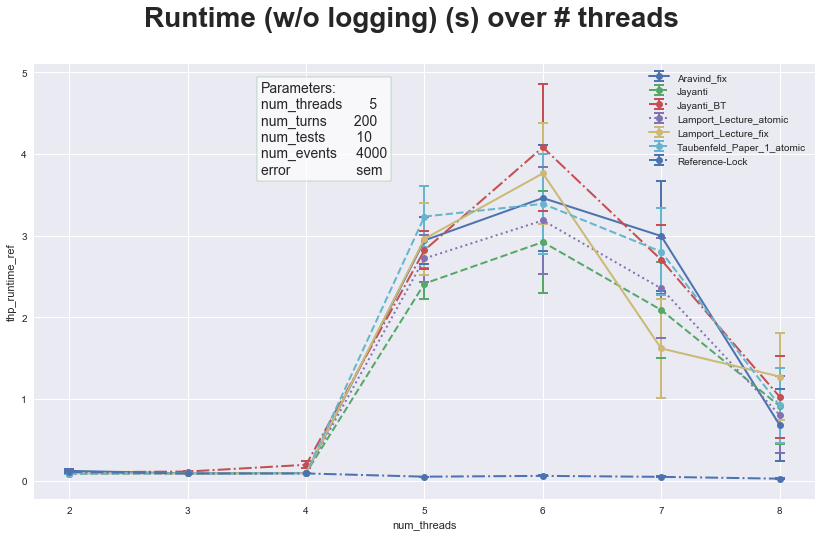

In [421]:
plot_col(df, x_col="num_threads", y_col="thp_runtime_wanc", title="Runtime (w/ logging) (s) over # threads", norm=False)
plt.savefig("plots/runtime.png")
plt.show()
plot_col(df, x_col="num_threads", y_col="thp_runtime_ref", title="Runtime (w/o logging) (s) over # threads", norm=False)
plt.savefig("plots/runtime_ref.png")
plt.show()

# Throughput

Plotting locks: ['Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic', 'Reference-Lock']


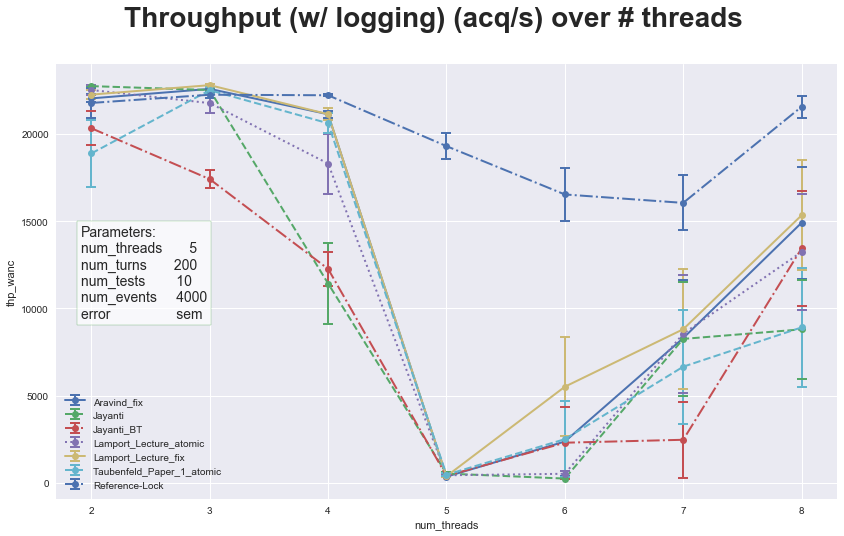

Plotting locks: ['Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic', 'Reference-Lock']


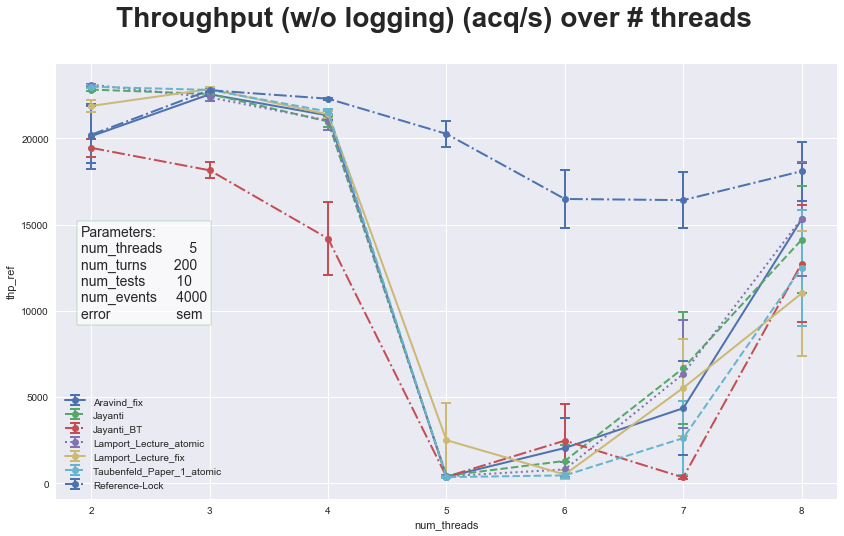

In [425]:
plot_col(df, x_col="num_threads", y_col="thp_wanc", title="Throughput (w/ logging) (acq/s) over # threads", norm=False, paramPos=(0.15, 0.6))
plt.savefig("plots/throughput.png")
plt.show()
plot_col(df, x_col="num_threads", y_col="thp_ref", title="Throughput (w/o logging) (acq/s) over # threads", norm=False, paramPos=(0.15, 0.6))
plt.savefig("plots/throughput_ref.png")
plt.show()

In [432]:
filtered2 = list(filter(lambda x: any([x.find(l)>=0 for l in ["fix", "atomic", "BT"]]), all_locks))
filtered2

['Aravind_fix',
 'Jayanti_BT',
 'Lamport_Lecture_atomic',
 'Lamport_Lecture_fix',
 'Taubenfeld_Paper_1_atomic']

In [433]:
all_locks

array(['Aravind', 'Aravind_fix', 'Jayanti', 'Jayanti_BT',
       'Lamport_Lecture', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix',
       'Lamport_Original', 'Reference-Lock', 'Taubenfeld_Paper_1',
       'Taubenfeld_Paper_1_Fix', 'Taubenfeld_Paper_1_atomic'],
      dtype=object)

Plotting locks: ['Aravind_fix', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic']


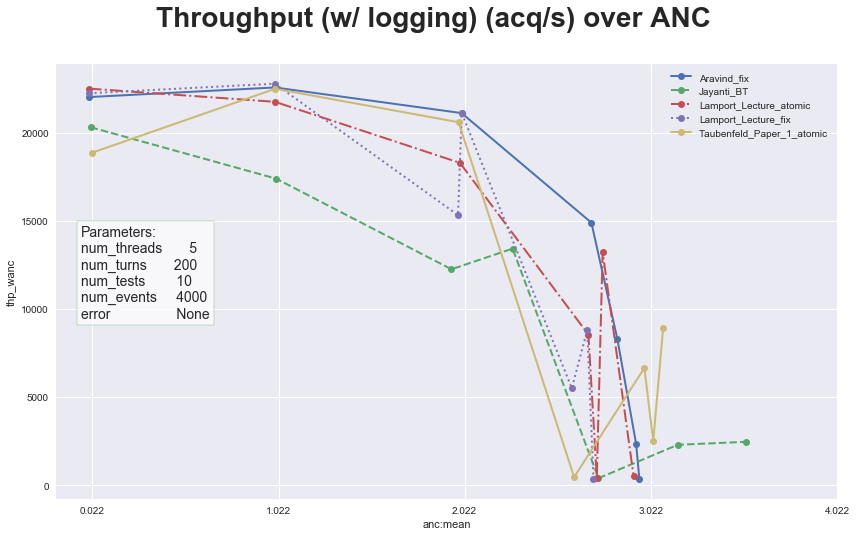

In [437]:
plot_col(df.sort_values(["lock_name", "anc:mean"]), x_col="anc:mean", y_col="thp_wanc", title="Throughput (w/ logging) (acq/s) over ANC", 
         norm=False, paramPos=(0.15, 0.6), locksToPlot=filtered2, errBarMode="None")
plt.savefig("plots/throughput_over_anc.png")
plt.show()

# Average number of contenders

Plotting locks: ['Aravind_fix', 'Jayanti', 'Jayanti_BT', 'Lamport_Lecture_atomic', 'Lamport_Lecture_fix', 'Taubenfeld_Paper_1_atomic', 'Reference-Lock']


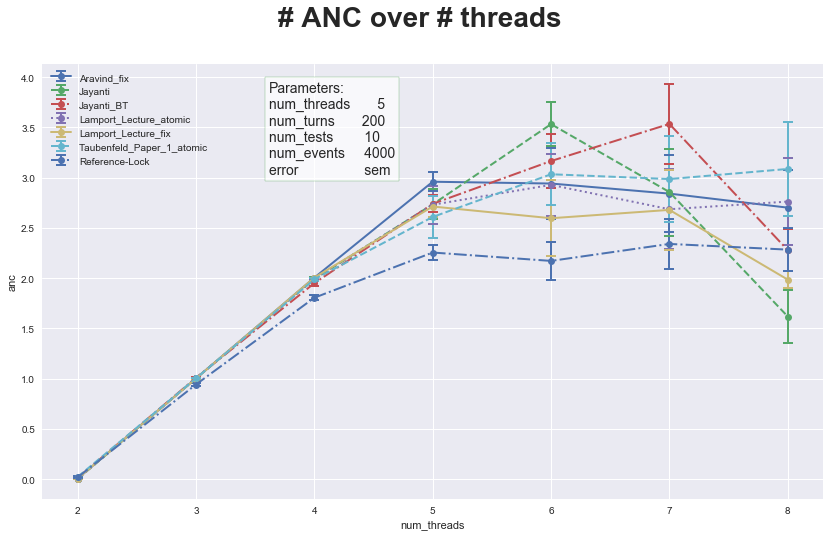

In [363]:
plot_col(df, x_col="num_threads", y_col="anc", title="# ANC over # threads", norm=False)
plt.savefig("plots/anc.png")
plt.show()